In [144]:
import pandas as pd
import numpy as np
import random

In [145]:
data = pd.read_csv("/content/drive/MyDrive/2023_M1/Business_Economics/2/data_2.csv")
data

,NameID,year,Maker,Type,Sales,price,FuelEfficiency,HH,size,hppw,...,hppw_sqr_other_sum,FuelEfficiency_sqr_other_sum,size_sqr_other_sum,count_GH2,iv_GH_other_hppw,iv_GH_other_FuelEfficiency,iv_GH_other_size,log_sales,log_price,logit_share
0,0,2011,Audi,Foreign,4206,2.998037,19.4,53783435,9.947232,0.102521,...,1.819955,43068.89,22207.674377,160,0.216315,5703.33,1332.329593,8.344267,1.097958,-9.393249
1,0,2012,Audi,Foreign,4502,2.835000,19.4,54171475,9.947232,0.102521,...,1.847895,48757.65,23198.867591,167,0.220620,6457.49,1428.505882,8.412277,1.042042,-9.311748
2,0,2013,Audi,Foreign,5071,2.823261,19.4,54594744,9.947232,0.102521,...,1.728182,54138.71,22804.643189,164,0.201628,6612.26,1400.559199,8.531293,1.037893,-9.200298
3,1,2006,Audi,Foreign,4830,2.918889,12.2,51102005,10.815126,0.075000,...,1.776015,38911.12,22009.511368,165,0.255313,4557.36,1004.291203,8.482602,1.071203,-9.178150
4,1,2007,Audi,Foreign,3874,2.939444,12.2,51713048,10.815126,0.075000,...,1.785286,38762.92,22237.876797,165,0.252811,4335.92,1039.113937,8.262043,1.078221,-9.415986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,259,2006,Volvo,Foreign,5990,4.717500,9.6,51102005,12.694204,0.108974,...,1.776015,38911.12,22009.511368,165,0.177596,7761.04,1291.274926,8.697847,1.551279,-8.962905
1819,259,2007,Volvo,Foreign,6018,4.666111,9.6,51713048,12.593196,0.108974,...,1.785286,38762.92,22237.876797,165,0.177771,7555.24,1249.269241,8.702510,1.540326,-8.975518
1820,259,2008,Volvo,Foreign,3635,4.944341,8.6,52324877,14.089241,0.114286,...,1.835727,39436.96,22275.939131,165,0.248251,9524.44,2271.781773,8.198364,1.598244,-9.495103
1821,259,2009,Volvo,Foreign,2006,5.128611,8.6,52877802,14.089241,0.114286,...,1.894772,39451.98,23050.604158,166,0.246291,9559.70,2113.979831,7.603898,1.634835,-10.106154


In [146]:
# 分析に使用するデータのみ抽出
data = data.drop(columns = {"Maker","Type"})

words_ends = ("_sum","_sqr","_GH1","_GH1")
filtered_columns = data.loc[:, data.columns.str.endswith(words_ends)]

# Extract the data where the condition is False
data = data.loc[:, ~data.columns.str.endswith(words_ends)]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NameID                       1823 non-null   int64  
 1   year                         1823 non-null   int64  
 2   Sales                        1823 non-null   int64  
 3   price                        1823 non-null   float64
 4   FuelEfficiency               1823 non-null   float64
 5   HH                           1823 non-null   int64  
 6   size                         1823 non-null   float64
 7   hppw                         1823 non-null   float64
 8   share                        1823 non-null   float64
 9   share0                       1823 non-null   float64
 10  iv_BLP_own_hppw              1823 non-null   float64
 11  iv_BLP_own_FuelEfficiency    1823 non-null   float64
 12  iv_BLP_own_size              1823 non-null   float64
 13  iv_BLP_other_hppw 

## 4

In [147]:
# サンプルを抽出
NameID = data["NameID"].unique()
NameID = NameID.tolist()

random.seed(123)
NameID_NIPYO = random.sample(NameID, 30)

data_NIPYO = data.query("NameID == @NameID_NIPYO")

In [148]:
import statsmodels.api as sm
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

In [149]:
Y = data_NIPYO["log_sales"]
X = data_NIPYO[["log_price","hppw","FuelEfficiency","size"]]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
result = model.fit(cov_type = "HC3")

result.summary(slim = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.400
No. Observations:                 226   F-statistic:                     45.96
Covariance Type:                  HC3   Prob (F-statistic):           4.57e-28
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.1540      1.514      3.404      0.001       2.186       8.122
log_price         -1.0871      0.227     -4.789      0.000      -1.532      -0.642
hppw               5.1904      4.280      1.213      0.225      -3.198      13.578
FuelEfficiency     0.1767      0.027      6.490      0.000       0.123       0.230
size               0.0685      0.091      0.756      0.450      -0.109       0.246
==================================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

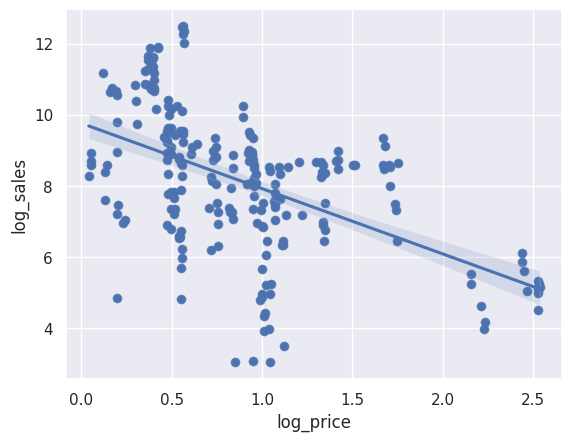

In [150]:
# Create a scatter plot with log-log scale
sns.scatterplot(x='log_price', y='log_sales', data=data_NIPYO)

# Fit a linear regression line
sns.regplot(x='log_price', y='log_sales', data=data_NIPYO)

# Show plot
plt.show()

In [151]:
data_NIPYO[["Sales","price","FuelEfficiency","size","hppw"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,226.0,17846.168142,41294.115130,21.000000,1045.500000,4316.500000,10334.750000,266567.000000
price,226.0,3.002075,2.523763,1.042567,1.640333,2.283597,2.926268,12.626474
FuelEfficiency,226.0,14.443363,5.761503,7.600000,10.600000,13.000000,18.400000,37.000000
size,226.0,12.158777,1.921538,8.187467,10.789692,11.931106,13.498020,16.427814
hppw,226.0,0.106449,0.029583,0.052525,0.091667,0.096154,0.114648,0.192073


## 5

In [152]:
#!pip install linearmodels
import linearmodels as lm
from linearmodels.panel import PanelOLS
from linearmodels.panel.data import PanelData
#from linearmodels.panel import FirstDifferenceOLS

In [153]:
data

,NameID,year,Sales,price,FuelEfficiency,HH,size,hppw,share,share0,...,iv_GH_own_hppw,iv_GH_own_FuelEfficiency,iv_GH_own_size,count_GH2,iv_GH_other_hppw,iv_GH_other_FuelEfficiency,iv_GH_other_size,log_sales,log_price,logit_share
0,0,2011,4206,2.998037,19.4,53783435,9.947232,0.102521,0.000078,0.938981,...,0.000154,43.84,6.619649,160,0.216315,5703.33,1332.329593,8.344267,1.097958,-9.393249
1,0,2012,4502,2.835000,19.4,54171475,9.947232,0.102521,0.000083,0.919762,...,0.000349,39.20,6.811799,167,0.220620,6457.49,1428.505882,8.412277,1.042042,-9.311748
2,0,2013,5071,2.823261,19.4,54594744,9.947232,0.102521,0.000093,0.919563,...,0.000308,31.37,7.591378,164,0.201628,6612.26,1400.559199,8.531293,1.037893,-9.200298
3,1,2006,4830,2.918889,12.2,51102005,10.815126,0.075000,0.000095,0.915228,...,0.000181,1.00,0.624049,165,0.255313,4557.36,1004.291203,8.482602,1.071203,-9.178150
4,1,2007,3874,2.939444,12.2,51713048,10.815126,0.075000,0.000075,0.920174,...,0.005694,1.04,0.639514,165,0.252811,4335.92,1039.113937,8.262043,1.078221,-9.415986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,259,2006,5990,4.717500,9.6,51102005,12.694204,0.108974,0.000117,0.915228,...,0.000000,0.00,0.000000,165,0.177596,7761.04,1291.274926,8.697847,1.551279,-8.962905
1819,259,2007,6018,4.666111,9.6,51713048,12.593196,0.108974,0.000116,0.920174,...,0.000000,0.00,0.000000,165,0.177771,7555.24,1249.269241,8.702510,1.540326,-8.975518
1820,259,2008,3635,4.944341,8.6,52324877,14.089241,0.114286,0.000069,0.923564,...,0.000000,0.00,0.000000,165,0.248251,9524.44,2271.781773,8.198364,1.598244,-9.495103
1821,259,2009,2006,5.128611,8.6,52877802,14.089241,0.114286,0.000038,0.929190,...,0.000166,9.00,6.193435,166,0.246291,9559.70,2113.979831,7.603898,1.634835,-10.106154


In [154]:
# PanelData に変換
data = data.set_index(["NameID","year"],drop = False)
panel_data = PanelData(data)
panel_data

PanelData
             NameID    year   Sales     price  FuelEfficiency          HH  \
NameID year                                                                 
0      2011     0.0  2011.0  4206.0  2.998037            19.4  53783435.0   
       2012     0.0  2012.0  4502.0  2.835000            19.4  54171475.0   
       2013     0.0  2013.0  5071.0  2.823261            19.4  54594744.0   
1      2006     1.0  2006.0  4830.0  2.918889            12.2  51102005.0   
       2007     1.0  2007.0  3874.0  2.939444            12.2  51713048.0   
...             ...     ...     ...       ...             ...         ...   
259    2006   259.0  2006.0  5990.0  4.717500             9.6  51102005.0   
       2007   259.0  2007.0  6018.0  4.666111             9.6  51713048.0   
       2008   259.0  2008.0  3635.0  4.944341             8.6  52324877.0   
       2009   259.0  2009.0  2006.0  5.128611             8.6  52877802.0   
       2010   259.0  2010.0  2317.0  5.165813             9.5  53362801.0   

                  size      hppw     share    share0  ...  iv_GH_own_hppw  \
NameID year                                           ...                   
0      2011   9.947232  0.102521  0.000078  0.938981  ...        0.000154   
       2012   9.947232  0.102521  0.000083  0.919762  ...        0.000349   
       2013   9.947232  0.102521  0.000093  0.919563  ...        0.000308   
1      2006  10.815126  0.075000  0.000095  0.915228  ...        0.000181   
       2007  10.815126  0.075000  0.000075  0.920174  ...        0.005694   
...                ...       ...       ...       ...  ...             ...   
259    2006  12.694204  0.108974  0.000117  0.915228  ...        0.000000   
       2007  12.593196  0.108974  0.000116  0.920174  ...        0.000000   
       2008  14.089241  0.114286  0.000069  0.923564  ...        0.000000   
       2009  14.089241  0.114286  0.000038  0.929190  ...        0.000166   
       2010  14.089241  0.132000  0.000043  0.924957  ...        0.000936   

             iv_GH_own_FuelEfficiency  iv_GH_own_size  count_GH2  \
NameID year                                                        
0      2011                     43.84        6.619649      160.0   
       2012                     39.20        6.811799      167.0   
       2013                     31.37        7.591378      164.0   
1      2006                      1.00        0.624049      165.0   
       2007                      1.04        0.639514      165.0   
...                               ...             ...        ...   
259    2006                      0.00        0.000000      165.0   
       2007                      0.00        0.000000      165.0   
       2008                      0.00        0.000000      165.0   
       2009                      9.00        6.193435      166.0   
       2010                      1.21        6.193435      170.0   

             iv_GH_other_hppw  iv_GH_other_FuelEfficiency  iv_GH_other_size  \
NameID year                                                                   
0      2011          0.216315                     5703.33       1332.329593   
       2012          0.220620                     6457.49       1428.505882   
       2013          0.201628                     6612.26       1400.559199   
1      2006          0.255313                     4557.36       1004.291203   
       2007          0.252811                     4335.92       1039.113937   
...                       ...                         ...               ...   
259    2006          0.177596                     7761.04       1291.274926   
       2007          0.177771                     7555.24       1249.269241   
       2008          0.248251                     9524.44       2271.781773   
       2009          0.246291                     9559.70       2113.979831   
       2010          0.381444                     8711.27       2192.522177   

             log_sales  log_price  logit_share  
NameID year             

In [155]:
# OLS Model
ols = PanelOLS.from_formula('logit_share ~ 1 + price + hppw + FuelEfficiency + size', data=panel_data)
ols = ols.fit(cov_type = "clustered")

ols.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,-12.255,0.3648,-33.591,0.0000,-12.970,-11.539
price,-0.2551,0.0258,-9.8848,0.0000,-0.3057,-0.2045
hppw,-0.6542,1.2843,-0.5094,0.6105,-3.1730,1.8646
FuelEfficiency,0.1301,0.0097,13.358,0.0000,0.1110,0.1492
size,0.1822,0.0189,9.6328,0.0000,0.1451,0.2193


## linearmodels
* 被説明変数 ~ 定数項 + 外生変数 + [内生変数 ~ 操作変数]

In [156]:
panel_data

PanelData
             NameID    year   Sales     price  FuelEfficiency          HH  \
NameID year                                                                 
0      2011     0.0  2011.0  4206.0  2.998037            19.4  53783435.0   
       2012     0.0  2012.0  4502.0  2.835000            19.4  54171475.0   
       2013     0.0  2013.0  5071.0  2.823261            19.4  54594744.0   
1      2006     1.0  2006.0  4830.0  2.918889            12.2  51102005.0   
       2007     1.0  2007.0  3874.0  2.939444            12.2  51713048.0   
...             ...     ...     ...       ...             ...         ...   
259    2006   259.0  2006.0  5990.0  4.717500             9.6  51102005.0   
       2007   259.0  2007.0  6018.0  4.666111             9.6  51713048.0   
       2008   259.0  2008.0  3635.0  4.944341             8.6  52324877.0   
       2009   259.0  2009.0  2006.0  5.128611             8.6  52877802.0   
       2010   259.0  2010.0  2317.0  5.165813             9.5  53362801.0   

                  size      hppw     share    share0  ...  iv_GH_own_hppw  \
NameID year                                           ...                   
0      2011   9.947232  0.102521  0.000078  0.938981  ...        0.000154   
       2012   9.947232  0.102521  0.000083  0.919762  ...        0.000349   
       2013   9.947232  0.102521  0.000093  0.919563  ...        0.000308   
1      2006  10.815126  0.075000  0.000095  0.915228  ...        0.000181   
       2007  10.815126  0.075000  0.000075  0.920174  ...        0.005694   
...                ...       ...       ...       ...  ...             ...   
259    2006  12.694204  0.108974  0.000117  0.915228  ...        0.000000   
       2007  12.593196  0.108974  0.000116  0.920174  ...        0.000000   
       2008  14.089241  0.114286  0.000069  0.923564  ...        0.000000   
       2009  14.089241  0.114286  0.000038  0.929190  ...        0.000166   
       2010  14.089241  0.132000  0.000043  0.924957  ...        0.000936   

             iv_GH_own_FuelEfficiency  iv_GH_own_size  count_GH2  \
NameID year                                                        
0      2011                     43.84        6.619649      160.0   
       2012                     39.20        6.811799      167.0   
       2013                     31.37        7.591378      164.0   
1      2006                      1.00        0.624049      165.0   
       2007                      1.04        0.639514      165.0   
...                               ...             ...        ...   
259    2006                      0.00        0.000000      165.0   
       2007                      0.00        0.000000      165.0   
       2008                      0.00        0.000000      165.0   
       2009                      9.00        6.193435      166.0   
       2010                      1.21        6.193435      170.0   

             iv_GH_other_hppw  iv_GH_other_FuelEfficiency  iv_GH_other_size  \
NameID year                                                                   
0      2011          0.216315                     5703.33       1332.329593   
       2012          0.220620                     6457.49       1428.505882   
       2013          0.201628                     6612.26       1400.559199   
1      2006          0.255313                     4557.36       1004.291203   
       2007          0.252811                     4335.92       1039.113937   
...                       ...                         ...               ...   
259    2006          0.177596                     7761.04       1291.274926   
       2007          0.177771                     7555.24       1249.269241   
       2008          0.248251                     9524.44       2271.781773   
       2009          0.246291                     9559.70       2113.979831   
       2010          0.381444                     8711.27       2192.522177   

             log_sales  log_price  logit_share  
NameID year             

In [162]:
# BLP with Instrumental Variables Model
iv_blp = PanelIV.from_formula('logit_share ~ 1 + hppw + FuelEfficiency + size + [price ~ iv_BLP_own_hppw + iv_BLP_own_FuelEfficiency + iv_BLP_own_size + iv_BLP_other_hppw + iv_BLP_other_FuelEfficiency + iv_BLP_other_size]',data=panel_data)

NameError: name 'PanelIV' is not defined